In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gc

gc.collect()

0

In [3]:
X_train_canvas = np.load('dataset/X_train_canvas.npy')
coords = np.load('dataset/coords.npy')
y_train = np.load('dataset/y_train.npy')
X_test_canvas = np.load('dataset/X_test_canvas.npy')
coords_test = np.load('dataset/coords_test.npy')
y_test = np.load('dataset/y_test.npy')

In [4]:
coords = coords.T
coords_test = coords_test.T

In [5]:
X_test_canvas.shape

(10000, 16384)

In [6]:
X_train_2d = X_train_canvas.reshape(X_train_canvas.shape[0], 128, 128)
X_test_2d = X_test_canvas.reshape(X_test_canvas.shape[0], 128, 128)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape
input_shape = (128, 128, 1)  # Assuming 3 channels (RGB)

# Create the model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the last convolutional layer
model.add(layers.Flatten())

# Add fully connected (dense) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer for regression to predict x and y coordinates
model.add(layers.Dense(2))  # Output layer with 2 neurons (x and y)

#optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

c:\Users\aless\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import os

log_dir = "logs"
tensorboard_callback = TensorBoard(log_dir=log_dir)

checkpoint_path = "training_1"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'model_epoch_{epoch:02d}.weights.h5'),
                                                 save_weights_only=True,
                                                 verbose=1)

num_epochs = 30
model_run = model.fit(
    X_train_2d,
    coords,
    epochs=num_epochs,
    batch_size=512,
    validation_data=(X_test_2d, coords_test),
    callbacks=[tensorboard_callback, cp_callback],
)

In [ ]:
history_model = model_run.history
print("The history has the following data: ", history_model.keys())

# Plotting the training and validation accuracy during the training
sns.lineplot(
    x=model_run.epoch, y=history_model["accuracy"], color="blue", label="Training set"
)
sns.lineplot(
    x=model_run.epoch,
    y=history_model["val_accuracy"],
    color="red",
    label="Valdation set",
)
plt.xlabel("epochs")
plt.ylabel("accuracy")

In [9]:
cp_dir = 'H:\\aless\Documents\Python_Scripts\Matur\mnist\\training_1\sect\model_epoch_09.weights.h5'

model.load_weights(cp_dir)

# Evaluating the model on test dataset
model.evaluate(X_test_2d, coords_test)

c:\Users\aless\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 8.9263 - mean_absolute_error: 2.2305


[8.884489059448242, 2.2097558975219727]

In [37]:
X_test_2d[74].shape

(128, 128)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


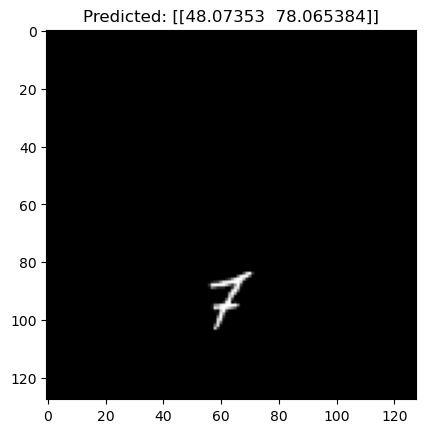

In [40]:
random_sample = np.random.randint(0, X_test_2d.shape[0])

image = X_test_2d[random_sample]
prediction = model.predict(X_test_2d[random_sample].reshape(1, 128, 128, 1))

plt.imshow(image, cmap='gray')
plt.title(f"Predicted: {prediction}")
plt.show()